In [82]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[ : , 1:-1 ].values
y = dataset.iloc[ : , -1 ].values

In [83]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [84]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [85]:
y= y.reshape(len(y),1)

## implementation of feature scaling

In [86]:
from sklearn.preprocessing import StandardScaler 

In [87]:
sc_X= StandardScaler()

In [88]:
sc_y= StandardScaler()

In [89]:
X= sc_X.fit_transform(X)

In [90]:
y=sc_y.fit_transform(y)
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on whole dataset

In [91]:
from sklearn.svm import SVR

In [92]:
regressor= SVR()

In [93]:
regressor.fit(X,y)

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## predicting a new result

In [94]:
y_pred=regressor.predict(sc_X.transform([[6.5]]))

In [95]:
y_pred= sc_y.inverse_transform(y_pred.reshape(-1,1))
y_pred

array([[170370.0204065]])

In [96]:
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)))

[[170370.0204065]]


## Visualizing of the SVR result

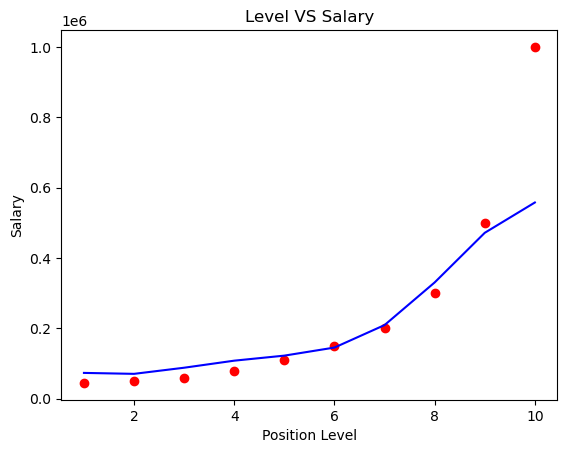

In [100]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Level VS Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()